In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

import os
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import*
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
data = pd.read_csv("/content/drive/MyDrive/Loan_Prediction_dataMining/dataset/home-credit-default-risk/loan_data_of.csv")

In [ ]:
data.shape

(307511, 246)

In [3]:
data.head()

,Unnamed: 0,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET,DAYS_EMPLOYED_ANOM,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT
0,0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,1,0,1,0,1,False,2.007889,0.121978,0.060749,-0.067329
1,1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,1,0,0,False,4.790750,0.132217,0.027598,-0.070862
2,2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,False,2.000000,0.100000,0.050000,-0.011814
3,3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,False,2.316167,0.219900,0.094941,-0.159905
4,4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,False,4.222222,0.179963,0.042623,-0.152418


In [4]:
data = data.drop(columns = ['Unnamed: 0'])

In [5]:
data.shape

(307511, 245)

In [ ]:
from sklearn.model_selection import train_test_split
train, test  = train_test_split(data, test_size = 0.30,
                                                    random_state = 1)

In [ ]:
X_train = train.drop(columns = ['TARGET'])
y_train = train.iloc[:, -6]

In [ ]:
X_test = test.drop(columns = ['TARGET'])
y_test = test.iloc[:, -6]

<Axes: ylabel='Frequency'>

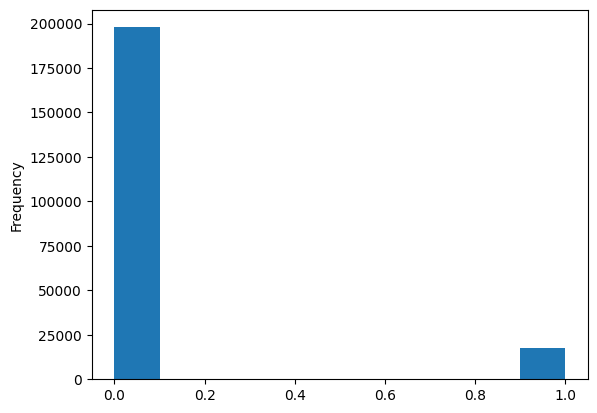

In [ ]:
y_train.astype(int).plot.hist()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Drop the target from the training data

train = X_train.copy()

# Feature names
features = list(train.columns)

# Copy of the testing data
test = X_test.copy()

# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(test)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (215257, 244)
Testing data shape:  (92254, 244)


In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (395798, 244)
After OverSampling, the shape of train_y: (395798,) 

After OverSampling, counts of label '1': 197899
After OverSampling, counts of label '0': 197899


In [ ]:
from sklearn.linear_model import LogisticRegression

log_class = LogisticRegression()
log_class.fit(X_train_res, y_train_res.ravel())

LogisticRegression()

In [ ]:
import eli5
from eli5.sklearn import *

In [ ]:
pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107730 sha256=fde8804e179bfa2db295e578451bbf0b04eead46e471bcbd453cba1b6dfe6ace
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
train_col = data.drop(columns = ['TARGET'])

In [ ]:
%load_ext google.colab.data_table

In [ ]:
perm = PermutationImportance(log_class, random_state = 1)
perm.fit(test, y_test)
eli5.show_weights(perm, feature_names = train_col.columns.tolist())

Weight,Feature
0.0198 ± 0.0013,AMT_GOODS_PRICE
0.0150 ± 0.0016,NAME_INCOME_TYPE_Pensioner
0.0149 ± 0.0011,AMT_ANNUITY
0.0144 ± 0.0015,CREDIT_TERM
0.0121 ± 0.0005,HOUSETYPE_MODE_block of flats
0.0117 ± 0.0013,EXT_SOURCE_3
0.0064 ± 0.0006,REGION_RATING_CLIENT
0.0048 ± 0.0012,NAME_EDUCATION_TYPE_Higher education
0.0039 ± 0.0010,FLAG_EMP_PHONE
0.0035 ± 0.0021,EXT_SOURCE_2


In [ ]:
eli5.explain_weights_df(perm, feature_names = train_col.columns.tolist())

,feature,weight,std
0,AMT_GOODS_PRICE,0.019847,0.000657
1,NAME_INCOME_TYPE_Pensioner,0.015039,0.000789
2,AMT_ANNUITY,0.014946,0.000561
3,CREDIT_TERM,0.014443,0.000765
4,HOUSETYPE_MODE_block of flats,0.012054,0.000273
...,...,...,...
239,NAME_EDUCATION_TYPE_Secondary / secondary special,-0.000956,0.000383
240,NAME_CONTRACT_TYPE,-0.001446,0.000245
241,DAYS_EMPLOYED_PERCENT,-0.002023,0.000318
242,EXT_SOURCE_1,-0.002255,0.000672


In [23]:
sub_data = data[['AMT_GOODS_PRICE',
'NAME_INCOME_TYPE_Pensioner',
'AMT_ANNUITY',
'CREDIT_TERM',
'HOUSETYPE_MODE_block of flats',
'EXT_SOURCE_3',
'REGION_RATING_CLIENT',
'NAME_EDUCATION_TYPE_Higher education',
'FLAG_EMP_PHONE',
'EXT_SOURCE_2',
'FLAG_DOCUMENT_3',
'FLAG_DOCUMENT_6',
'FLAG_OWN_CAR',
'ORGANIZATION_TYPE_Business Entity Type 3',
'NAME_TYPE_SUITE_Unaccompanied',
'FLAG_DOCUMENT_8',
'ORGANIZATION_TYPE_XNA',
'DAYS_EMPLOYED_ANOM',
'APARTMENTS_MODE',
'LIVINGAREA_MODE',
'ELEVATORS_MODE',
'OCCUPATION_TYPE_Sales staff',
'NAME_TYPE_SUITE_Family',
'CREDIT_INCOME_PERCENT',
'ORGANIZATION_TYPE_Construction',

'NAME_HOUSING_TYPE_House / apartment',
'OCCUPATION_TYPE_Cooking staff',
'OCCUPATION_TYPE_Laborers',
'APARTMENTS_MEDI',
'LIVINGAREA_AVG',
'OCCUPATION_TYPE_Cleaning staff',
'ORGANIZATION_TYPE_Medicine',
'REG_REGION_NOT_WORK_REGION',
'CODE_GENDER_F',
'ORGANIZATION_TYPE_Business Entity Type 2',
'CODE_GENDER_M',
'FLAG_DOCUMENT_5',
'NAME_HOUSING_TYPE_Municipal apartment',
'ORGANIZATION_TYPE_Other',
'FLOORSMIN_MODE',
'REGION_POPULATION_RELATIVE',
'FLAG_DOCUMENT_16',
'APARTMENTS_AVG',
'LIVINGAPARTMENTS_MEDI',
'REG_REGION_NOT_LIVE_REGION',
'ORGANIZATION_TYPE_Trade: type 3',
'EMERGENCYSTATE_MODE_Yes',
'NAME_EDUCATION_TYPE_Lower secondary',
'FLAG_DOCUMENT_18',
'OCCUPATION_TYPE_Private service staff',

'WALLSMATERIAL_MODE_Wooden',
'LIVE_CITY_NOT_WORK_CITY',
'AMT_REQ_CREDIT_BUREAU_WEEK',
'LANDAREA_AVG',
'ORGANIZATION_TYPE_Kindergarten',
'EMERGENCYSTATE_MODE_No',
'ORGANIZATION_TYPE_Housing',
'NAME_FAMILY_STATUS_Separated',
'WALLSMATERIAL_MODE_Block',
'NAME_FAMILY_STATUS_Widow',
'OCCUPATION_TYPE_Medicine staff',
'WEEKDAY_APPR_PROCESS_START_FRIDAY',
'DAYS_BIRTH',
'FONDKAPREMONT_MODE_reg oper account',
'ORGANIZATION_TYPE_Realtor',
'ORGANIZATION_TYPE_Government',
'LIVINGAREA_MEDI',
'CNT_CHILDREN',
'LIVINGAPARTMENTS_MODE',
'CNT_FAM_MEMBERS',
'ORGANIZATION_TYPE_Transport: type 4',
'BASEMENTAREA_MEDI',
'AMT_INCOME_TOTAL',
'NAME_HOUSING_TYPE_Rented apartment',
'HOUSETYPE_MODE_terraced house',

'OCCUPATION_TYPE_Low-skill Laborers',
'SK_ID_CURR',
'WALLSMATERIAL_MODE_Mixed',
'AMT_REQ_CREDIT_BUREAU_QRT',
'NAME_HOUSING_TYPE_Co-op apartment',
'OCCUPATION_TYPE_Realty agents',
'ORGANIZATION_TYPE_Transport: type 3',
'AMT_REQ_CREDIT_BUREAU_HOUR',
'WEEKDAY_APPR_PROCESS_START_MONDAY',
'WEEKDAY_APPR_PROCESS_START_SATURDAY',
'ORGANIZATION_TYPE_School',
'BASEMENTAREA_MODE',
'ORGANIZATION_TYPE_Culture',
'ORGANIZATION_TYPE_Industry: type 4',
'WALLSMATERIAL_MODE_Stone, brick',
'OCCUPATION_TYPE_Waiters/barmen staff',
'ORGANIZATION_TYPE_Advertising',
'ORGANIZATION_TYPE_Trade: type 7',
'ORGANIZATION_TYPE_Transport: type 2',
'ORGANIZATION_TYPE_Security',
'FLOORSMIN_AVG',
'ORGANIZATION_TYPE_Industry: type 11',
'ORGANIZATION_TYPE_Telecom',
'LANDAREA_MEDI',
'NAME_TYPE_SUITE_Spouse, partner',

'LIVINGAPARTMENTS_AVG',
'ORGANIZATION_TYPE_Transport: type 1',
'NAME_TYPE_SUITE_Other_B',
'FLAG_DOCUMENT_20',
'WALLSMATERIAL_MODE_Others',
'AMT_REQ_CREDIT_BUREAU_MON',
'FLAG_DOCUMENT_7',
'ORGANIZATION_TYPE_Industry: type 1',
'ORGANIZATION_TYPE_Industry: type 10',
'ORGANIZATION_TYPE_Industry: type 8',
'YEARS_BEGINEXPLUATATION_MEDI',

'TARGET'
]]

In [24]:
sub_data.shape

(307511, 112)

In [25]:
from sklearn.model_selection import train_test_split
train1, test1  = train_test_split(sub_data, test_size = 0.30,
                                                    random_state = 1)

In [26]:
X_train1 = train1.drop(columns = ['TARGET'])
y_train1 = train1.iloc[:, -1]

In [27]:
X_test1 = test1.drop(columns = ['TARGET'])
y_test1 = test1.iloc[:, -1]

In [28]:
y_train1.head()

208983    0
71687     0
301340    0
216927    0
109091    0
Name: TARGET, dtype: int64

<Axes: ylabel='Frequency'>

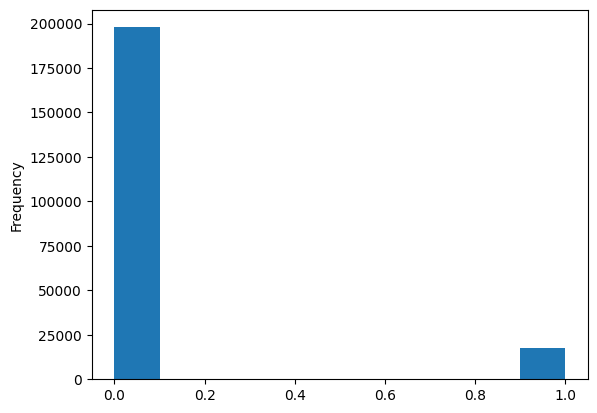

In [29]:
y_train1.astype(int).plot.hist()

In [30]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Drop the target from the training data

train = X_train1.copy()

# Feature names
features = list(train.columns)

# Copy of the testing data
test = X_test1.copy()

# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(test)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (215257, 111)
Testing data shape:  (92254, 111)


In [31]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(train, y_train1.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (395798, 111)
After OverSampling, the shape of train_y: (395798,) 

After OverSampling, counts of label '1': 197899
After OverSampling, counts of label '0': 197899


In [32]:
from sklearn.linear_model import LogisticRegression

log_class = LogisticRegression()
log_class.fit(X_train_res, y_train_res.ravel())

LogisticRegression()

In [33]:
y_pred = log_class.predict(test)
print(classification_report(y_test1, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.69      0.80     84787
           1       0.16      0.65      0.25      7467

    accuracy                           0.69     92254
   macro avg       0.56      0.67      0.53     92254
weighted avg       0.89      0.69      0.76     92254



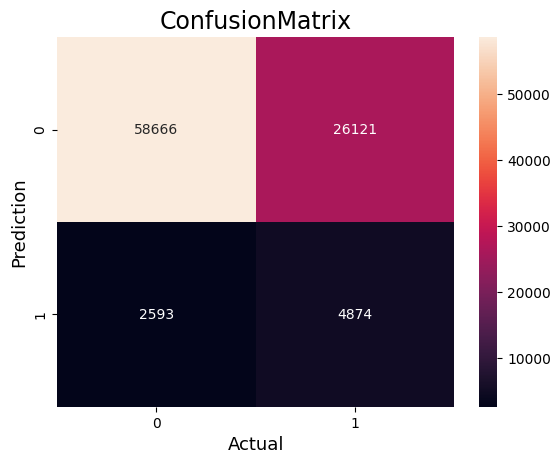

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test1, y_pred)

sns.heatmap(
    cm,
    annot = True,
    fmt = 'g',
    xticklabels = ['0', '1'],
    yticklabels = ['0', '1']
)

plt.ylabel('Prediction', fontsize =13)
plt.xlabel('Actual', fontsize = 13)
plt.title('ConfusionMatrix', fontsize = 17)
plt.show()

In [35]:
y_pred_prob = log_class.predict_proba(test)[:, 1]

In [36]:
# Compute the ROC AUC score
roc_auc = roc_auc_score(y_test1, y_pred_prob)
roc_auc

0.7325631151818849

In [38]:

# Compute the false positive rate (FPR)
# and true positive rate (TPR) for different classification thresholds
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_prob, pos_label=1)

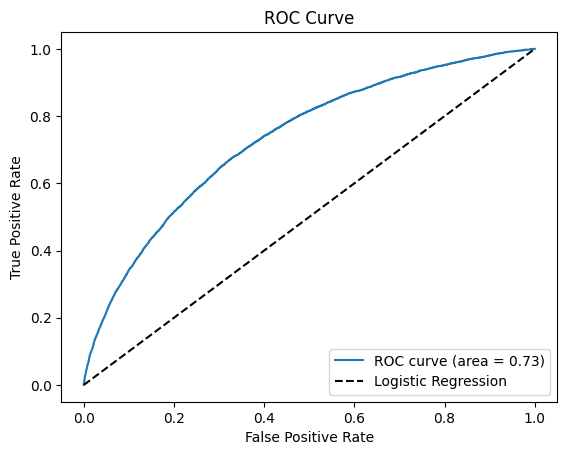

In [40]:

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# roc curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--', label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()